## Multimodal Emotion Recognition - Full system

### FileProcessor

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
import sys
import os
# insert the path to the source code directory
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)

from src.utils import load_meld

labels_df = load_meld()
labels_df.tail()

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Subfolders in the dataset: ['JSON files', 'MELD.Raw']
Subfolders in the raw data: ['dia47_utt11.mp4', 'dia35_utt2.mp4', 'dia47_utt9.mp4', 'dia167_utt14.mp4', 'dia232_utt4.mp4', '._dia118_utt11.mp4', 'dia34_utt2.mp4', 'dia268_utt8.mp4', 'dia233_utt4.mp4', '._dia39_utt1.mp4', '._dia230_utt3.mp4', 'dia137_utt0.mp4', '._dia268_utt11.mp4', '._dia231_utt3.mp4', 'dia136_utt0.mp4', '._dia38_utt1.mp4', '._dia34_utt16.mp4', '._dia128_utt2.mp4', 'dia28_utt7.mp4', 'dia195_utt8.mp4', 'dia22_utt15.mp4', '._dia129_utt2.mp4', '._dia100_utt5.mp4', 'dia29_utt7.mp4', 'dia103_utt2.mp4', 'final_videos_testdia48_utt3.mp4', 'dia154_utt12.mp4', '._dia95_utt11.mp4', '._dia205_utt1.mp4', 'dia102_utt2.mp4', 'dia107_utt8.mp4', 'dia253_utt11.mp4', '._dia52_utt5.mp4', 'dia175_utt3.mp4', 'dia93_utt0.mp4', '._dia272_utt0.mp4', '._dia192_utt5.mp4', 'dia174_utt3.mp4', '._dia53_utt5.mp4', 'dia175_utt13.mp4', 'dia92_utt0.mp4', 'dia191_utt2.mp4', 'dia77_utt1.mp4', 'dia259_utt0.mp4', 'dia270_utt7.mp4', 'dia123_utt11.mp4', 

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,"00:14:35,457","00:14:40,211",/Users/sofiafernandes/.cache/kagglehub/dataset...
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,"00:14:42,256","00:14:43,840",/Users/sofiafernandes/.cache/kagglehub/dataset...
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,"00:14:44,008","00:14:48,511",/Users/sofiafernandes/.cache/kagglehub/dataset...
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,"00:14:48,138","00:14:52,390",/Users/sofiafernandes/.cache/kagglehub/dataset...
2609,2764,I think you look fine.,Monica,neutral,neutral,279,15,6,4,"00:14:52,558","00:14:54,183",/Users/sofiafernandes/.cache/kagglehub/dataset...


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="Processing...")
from src.assistant import EmotionRecognitionAssistant
from src.recognizers import TextEmotionRecognizer
df = labels_df.sample(50)  # Sample 100 rows for testing
assistant = EmotionRecognitionAssistant()
#assistant = TextEmotionRecognizer()
#print(assistant.analyze(os.path.join(raw_path, "dia47_utt11.mp4")))
df['preds'] = df['filename'].progress_apply(assistant.analyze)

In [5]:
print(df.iloc[1].preds)
df.head()

{'text_emotion': {'transcription': " And you're gonna say no to that.", 'emotion': 'anger'}, 'audio_emotion': {'error': 'Error during audio emotion analysis: X has 62 features, but StandardScaler is expecting 50 features as input.'}, 'face_emotion': [{'emotions': {'angry': 0.0006124170065316121, 'disgust': 9.616793325456152e-07, 'fear': 0.035936279245797786, 'happy': 99.46546560937576, 'sad': 0.025896794800842428, 'surprise': 0.0014349158954452866, 'neutral': 0.47065325989982365}, 'dominant_emotion': 'happy'}, {'emotions': {'angry': 0.18619607435539365, 'disgust': 0.0006660389772150666, 'fear': 1.0737680830061436, 'happy': 97.48880863189697, 'sad': 0.03751065814867616, 'surprise': 0.5456441547721624, 'neutral': 0.6674051750451326}, 'dominant_emotion': 'happy'}, {'emotions': {'angry': 47.501957416534424, 'disgust': 0.003259419827372767, 'fear': 32.458168268203735, 'happy': 0.025033584097400308, 'sad': 12.435884773731232, 'surprise': 0.07939508650451899, 'neutral': 7.496302574872971}, 'd

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds
495,541,"Ross, please, I found the magazines!",Rachel,sadness,negative,54,11,6,5,"0:11:09,127","0:11:11,487",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Please I ...
192,217,"Well, I ain't gonna say no to that.",Joey,neutral,neutral,20,7,5,13,"00:05:28,328","00:05:30,704",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' And you'r...
1745,1829,I mean hi.,Phoebe,neutral,neutral,184,5,8,14,"00:14:49,600","00:14:51,000",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' I mean, h..."
2105,2231,"Monica, number one, I dont think Ben understa...",Rachel,surprise,negative,227,1,3,8,"00:12:11,939","00:12:19,154",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' But numbe...
885,942,"Me taking care of you is no problem, huh?",Phoebe,neutral,neutral,100,0,6,5,"00:15:38,938","00:15:41,606",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Are you t...


In [7]:
#df['audio_preds'] = df['preds'].progress_apply(lambda x: x['audio_emotion']['emotions'])
df['text_preds'] = df['preds'].progress_apply(lambda x: x['text_emotion']['emotion'] if 'text_emotion' in x.keys() else 'other')
df['face_preds'] = df['preds'].progress_apply(lambda x: [i['dominant_emotion']for i in x['face_emotion'] if 'dominant_emotion' in i.keys()] if 'face_emotion' in x.keys() else 'no face detected')
df.head()


Processing...: 100%|██████████| 50/50 [00:00<00:00, 28424.40it/s]


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,text_preds,face_preds
624,671,"Look, the truth is, I haven't felt this way...",Joey,sadness,negative,70,15,9,12,"00:16:45,462","00:16:51,000",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Look, the...",sad,"[angry, angry]"
505,552,Yeah.,Rachel,neutral,neutral,56,6,8,3,"00:20:44,034","00:20:45,076",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Yeah.', '...",neutral,"[fear, sad]"
958,1017,"By the way, Chandler. I cut you out of all my ...",Janice,anger,negative,109,2,1,14,"00:06:58,626","00:07:06,133",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' By the wa...,surprise,"[surprise, neutral, sad, neutral, surprise, su..."
1908,2010,"No, you, you cant fit in that thing. Thats n...",Guy,neutral,neutral,201,7,4,2,"00:13:57,878","00:14:01,214",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' No, you c...",anger,"[angry, angry, angry]"
109,127,"Yeah, I do.",Chandler,neutral,neutral,12,16,6,3,"00:13:55,125","00:13:56,543",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Yeah, I d...",happy,"[neutral, sad]"


In [ ]:
print(df.isna().sum())
# fill na values with "other"
#df.fillna({'text_preds': 'other', 'audio_preds': 'other', 'face_preds': 'other'}, inplace=True)
df.text_preds.value_counts()

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
filename        0
preds           0
text_preds      0
face_preds      0
label           0
dtype: int64


text_preds
surprise    14
neutral     13
angry        8
other        7
sad          5
happy        2
fear         1
Name: count, dtype: int64

: 

In [ ]:
import numpy as np
from collections import Counter

class LateFusion:
    def __init__(self, weights=None):
        """
        Initializes the LateFusion module with optional weights for different modalities.
        
        Args:
            weights (dict, optional): A dictionary mapping modalities to their importance weights.
                                     e.g., {'text': 0.5, 'audio': 0.3, 'video': 0.2}.
                                     If None, equal weights are assigned to all available modalities.
        """
        self.weights = {'text': 0.5, 'audio': 0.3, 'video': 0.2} if weights is None else weights
        
    def fuse(self, predictions_per_modality: dict):
        """
        Performs late fusion by aggregating a list of emotion predictions from each modality.
        
        Args:
            predictions_per_modality (dict): A dictionary where keys are modality names (e.g., 'text', 'audio', 'video')
                                             and values are lists of emotion labels predicted for that modality.
                                             e.g., {'text': ['sad'], 'audio': ['sad', 'neutral'], 'video': ['happy', 'happy', 'neutral']}
        
        Returns:
            str: The final, fused emotion label.
            dict: The scores for each emotion, useful for analysis.
        """
        # Get all unique emotion labels across all predictions
        all_emotions = set()
        for prediction_list in predictions_per_modality.values():
            all_emotions.update(prediction_list)
        
        if not all_emotions:
            return "neutral", {}

        # Initialize weights if none are provided
        if self.weights is None:
            num_modalities = len(predictions_per_modality)
            if num_modalities == 0:
                return "neutral", {}
            self.weights = {modality: 1 / num_modalities for modality in predictions_per_modality.keys()}

        # Initialize scores for each emotion
        emotion_scores = {emotion: 0.0 for emotion in all_emotions}
        
        # Aggregate scores from each modality
        for modality, predictions in predictions_per_modality.items():
            if modality in self.weights:
                weight = self.weights[modality]
                
                # Count the occurrences of each emotion within this modality's predictions
                emotion_counts = Counter(predictions)
                
                # Normalize the counts to get a distribution for this modality
                total_predictions = len(predictions)
                if total_predictions > 0:
                    for emotion, count in emotion_counts.items():
                        normalized_score = count / total_predictions
                        emotion_scores[emotion] += normalized_score * weight
        
        # Find the emotion with the highest aggregated score
        final_emotion = max(emotion_scores, key=emotion_scores.get)
        
        return final_emotion, emotion_scores

fusion = LateFusion()
df['fused_preds'] = df.progress_apply(
    lambda x: fusion.fuse({
        'text': x['text_preds'] if isinstance(x['text_preds'], list) else [x['text_preds']],
        'audio': x['audio_preds'] if isinstance(x['audio_preds'], list) else [x['audio_preds']],
        'image': x['face_preds'] if isinstance(x['face_preds'], list) else [x['face_preds']]
    }), axis=1
)

Processing...:   1%|          | 1/100 [00:00<00:00, 203.16it/s]


KeyError: 'text_preds'

In [9]:
df.to_csv('meld_predictions_100.csv', index=False)

In [ ]:
#df = df.dropna(subset=['audio_preds', 'text_preds'])
#df = pd.read_csv('meld_predictions.csv')
df.audio_preds.value_counts()

audio_preds
happy      4
sad        4
neutral    2
Name: count, dtype: int64

: 

In [ ]:
# function to choose the most frequent emotion or 'other' if no emotion is detected
def choose_most_frequent(emotions):
    if not emotions or 'no face detected' in emotions:
        return 'other'
    else:
        return max(set(emotions), key=emotions.count)
    
df['face_pred'] = df['face_preds'].progress_apply(choose_most_frequent)
df.head()

Processing...: 100%|██████████| 100/100 [00:00<00:00, 96265.87it/s]


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,face_preds,fused_preds,face_pred
1508,1581,Do,Mike,neutral,neutral,162,3,9,23,"0:40:23,003","0:40:23,345",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'audio_emotion': {'emotions': ['angry']}, 'fa...",[angry],other,[angry],"(angry, {'angry': 0.6666666666666666, 'other':...",angry
1553,1629,"Well, that's sort of a given, but yes. Anyone ...",The Teacher,neutral,neutral,167,4,5,9,"00:06:57,917","00:07:02,421",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Well, tha...",[neutral],neutral,[],"(neutral, {'neutral': 0.6666666666666666})",other
1662,1740,"Oh, okay. Hey, two beers.",Chloe,neutral,neutral,174,18,3,15,"00:18:35,948","00:18:38,533",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Okay, tak...",[angry],neutral,[sad],"(angry, {'angry': 0.3333333333333333, 'neutral...",sad
622,669,Huh?,Joey,anger,negative,70,13,9,12,"0:16:37,205","0:16:37,357",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'audio_emotion': {'emotions': ['neutral']}},[neutral],other,no face detected,"(no face detected, {'no face detected': 0.3333...",other
1889,1991,"Yeah, maybe.",Phoebe,sadness,negative,199,9,4,20,"00:18:39,451","00:18:40,493",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Yeah, may...",[neutral],neutral,"[fear, neutral]","(neutral, {'fear': 0.16666666666666666, 'neutr...",fear


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
map_labels = {
    'neutral': 'neutral',
    'sadness': 'sad',
    'anger': 'angry',
    'joy': 'happy',
    'surprise': 'surprise',
    'fear': 'fear',
    'disgust': 'disgust',
    "happy": 'happy',
    "angry": 'angry',
    "sad": 'sad',
}
df['label'] = df['Emotion'].map(map_labels) 
df['text_preds'] = df['text_preds'].map(lambda x: map_labels.get(x, 'other'))
#df['preds_audio1'] = df['preds_audio2'].progress_apply(lambda x: x['emotions'][0])
print(classification_report(df['label'], df['text_preds']))
print(confusion_matrix(df['label'], df['text_preds']))

              precision    recall  f1-score   support

       angry       0.12      0.33      0.18         3
     disgust       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         1
       happy       0.50      0.17      0.25         6
     neutral       1.00      0.46      0.63        28
       other       0.00      0.00      0.00         0
         sad       0.40      0.29      0.33         7
    surprise       0.07      0.25      0.11         4

    accuracy                           0.36        50
   macro avg       0.26      0.19      0.19        50
weighted avg       0.69      0.36      0.45        50

[[ 1  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  2  0  2]
 [ 2  0  1  1 13  3  2  6]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  2  3]
 [ 1  0  0  0  0  1  1  1]]


dolphin-mistral - 46%
openhermes - 40%
alien-emo = 36%

In [ ]:
# function to choose the most frequent emotion or 'other' if no emotion is detected
def choose_most_frequent_audio(emotions):
    
    return max(set(emotions), key=emotions.count)

df['audio_pred'] = df['audio_preds'].progress_apply(choose_most_frequent_audio)
df['audio_pred'].value_counts()

Processing...: 100%|██████████| 100/100 [00:00<00:00, 97000.56it/s]


audio_pred
angry      65
neutral    30
happy       3
sad         2
Name: count, dtype: int64

In [ ]:

print(classification_report(df['label'], df['audio_pred']))
print(confusion_matrix(df['label'], df['audio_pred']))

              precision    recall  f1-score   support

       angry       0.18      0.86      0.30        14
     disgust       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00         2
       happy       0.00      0.00      0.00        14
     neutral       0.43      0.30      0.36        43
         sad       0.00      0.00      0.00        10
    surprise       0.00      0.00      0.00        15

    accuracy                           0.25       100
   macro avg       0.09      0.17      0.09       100
weighted avg       0.21      0.25      0.20       100

[[12  0  0  1  1  0  0]
 [ 2  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0]
 [10  0  0  0  4  0  0]
 [27  0  0  1 13  2  0]
 [ 6  0  0  0  4  0  0]
 [ 7  0  0  1  7  0  0]]


In [ ]:
print(classification_report(df['label'], df['face_pred']))
print(confusion_matrix(df['label'], df['face_pred']))

              precision    recall  f1-score   support

       angry       0.11      0.14      0.12        14
     disgust       0.00      0.00      0.00         2
        fear       0.06      0.50      0.11         2
       happy       0.33      0.14      0.20        14
     neutral       0.56      0.23      0.33        43
       other       0.00      0.00      0.00         0
         sad       0.06      0.10      0.07        10
    surprise       0.00      0.00      0.00        15

    accuracy                           0.16       100
   macro avg       0.14      0.14      0.10       100
weighted avg       0.31      0.16      0.20       100

[[ 2  0  3  1  1  3  3  1]
 [ 0  0  0  0  1  0  1  0]
 [ 0  0  1  0  1  0  0  0]
 [ 1  0  1  2  2  3  4  1]
 [10  0  5  2 10  9  7  0]
 [ 0  0  0  0  0  0  0  0]
 [ 4  0  2  0  0  2  1  1]
 [ 2  0  4  1  3  3  2  0]]


In [18]:
df['fused_preds'].value_counts()

fused_preds
(angry, {'angry': 0.3333333333333333, 'neutral': 0.3333333333333333, 'sad': 0.3333333333333333})                                    7
(no face detected, {'no face detected': 0.3333333333333333, 'angry': 0.3333333333333333, 'neutral': 0.3333333333333333})            6
(neutral, {'neutral': 0.8333333333333333, 'sad': 0.16666666666666666})                                                              5
(neutral, {'no face detected': 0.3333333333333333, 'neutral': 0.6666666666666666})                                                  4
(neutral, {'angry': 0.3333333333333333, 'neutral': 0.6666666666666666})                                                             3
                                                                                                                                   ..
(angry, {'sad': 0.1111111111111111, 'angry': 0.6666666666666666, 'happy': 0.2222222222222222})                                      1
(neutral, {'neutral': 0.6666666666666666})        

In [ ]:
df['fused_pred'] = df['fused_preds'].progress_apply(lambda x: x[0])
print(classification_report(df['label'], df['fused_pred']))
print(confusion_matrix(df['label'], df['fused_pred']))

Processing...: 100%|██████████| 100/100 [00:00<00:00, 141508.23it/s]

              precision    recall  f1-score   support

       angry       0.50      0.36      0.42        14
     disgust       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00         2
       happy       0.50      0.21      0.30        14
     neutral       0.52      0.79      0.62        43
       other       0.00      0.00      0.00         0
         sad       0.50      0.10      0.17        10
    surprise       0.33      0.20      0.25        15

    accuracy                           0.46       100
   macro avg       0.29      0.21      0.22       100
weighted avg       0.46      0.46      0.42       100

[[ 5  0  0  0  6  1  1  1]
 [ 1  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  0  0]
 [ 1  1  0  3  7  1  0  1]
 [ 1  0  0  2 34  3  0  3]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  1  1  5  0  1  0]
 [ 0  0  0  0 12  0  0  3]]


In [24]:
!pip install matplotlib-venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45296 sha256=8a68da1f865768081494235d513ce7b2e8a80e6cf187ff4ad175efb23f97b85e
  Stored in directory: /Users/sofiafernandes/Library/Caches/pip/wheels/e3/2e/c4/c5186a3a6b066253bb6f29715c24ff961fff59fd67a71beb7d
Successfully built matplotlib-venn


Total number of samples in the DataFrame: 10
Columns available: ['text_preds', 'audio_preds', 'face_preds']

Unique emotions to plot: ['happy', 'neutral', 'sad']

--- Plotting Venn Diagram for 'Happy' ---
  Subset values (T, A, T&A, F, T&F, A&F, T&A&F): (1, 1, 2, 0, 1, 1, 0)
--------------------------------------------------


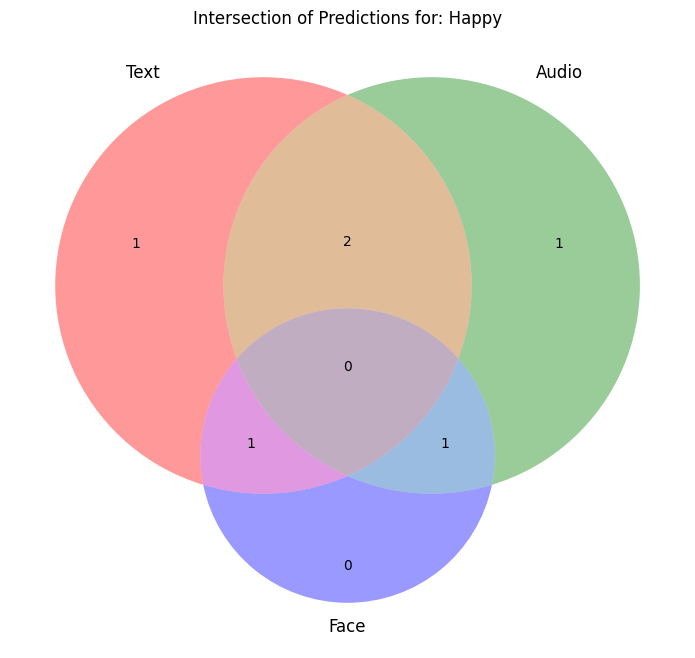

--- Plotting Venn Diagram for 'Neutral' ---
  Subset values (T, A, T&A, F, T&F, A&F, T&A&F): (2, 1, 0, 3, 0, 0, 1)
--------------------------------------------------


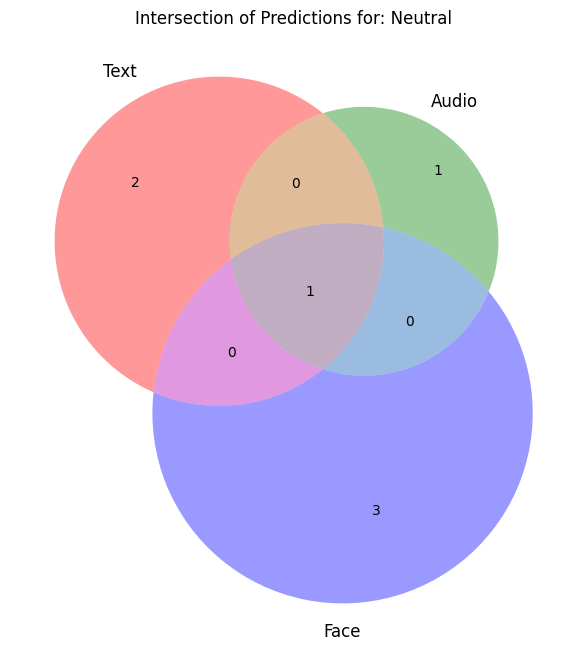

--- Plotting Venn Diagram for 'Sad' ---
  Subset values (T, A, T&A, F, T&F, A&F, T&A&F): (0, 0, 1, 1, 0, 1, 2)
--------------------------------------------------


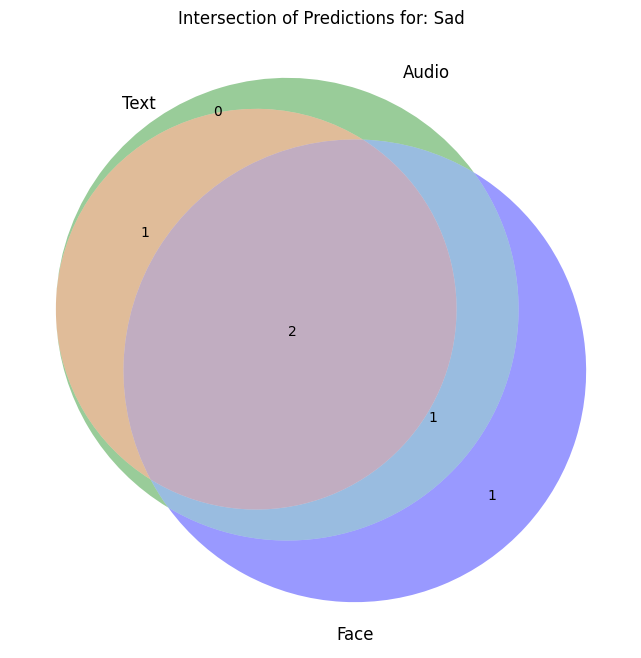

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# --- 1. Load your actual DataFrame from a previous step ---
# Assuming 'df' is already defined and has the columns 'text_preds', 'audio_preds', and 'face_preds'
# If not, you need to load it here, for example:
# df = pd.read_csv('your_predictions.csv')
# Or, if you have a dictionary of lists:
data = {
    'text_preds': ['happy', 'neutral', 'sad', 'happy', 'sad', 'happy', 'neutral', 'happy', 'sad', 'neutral'],
    'audio_preds': ['happy', 'happy', 'sad', 'neutral', 'sad', 'happy', 'happy', 'sad', 'sad', 'neutral'],
    'face_preds': ['neutral', 'happy', 'sad', 'happy', 'neutral', 'neutral', 'sad', 'sad', 'sad', 'neutral']
}
df = pd.DataFrame(data)


print(f"Total number of samples in the DataFrame: {len(df)}")
print(f"Columns available: {df.columns.tolist()}")

# 2. Define the function to calculate the 7 subset values
def calculate_venn_subsets(df, emotion):
    """
    Calculates the sizes of the sets and their intersections for a specific emotion.
    
    Returns a tuple of 7 integers.
    """
    text_set = set(df[df['text_preds'] == emotion].index)
    audio_set = set(df[df['audio_preds'] == emotion].index)
    face_set = set(df[df['face_preds'] == emotion].index)
    
    only_text = len(text_set - audio_set - face_set)
    only_audio = len(audio_set - text_set - face_set)
    only_face = len(face_set - text_set - audio_set)
    text_and_audio = len(text_set & audio_set - face_set)
    text_and_face = len(text_set & face_set - audio_set)
    audio_and_face = len(audio_set & face_set - text_set)
    all_three = len(text_set & audio_set & face_set)
    
    return (only_text, only_audio, text_and_audio, only_face, text_and_face, audio_and_face, all_three)

# 3. Get all unique emotions from your data
# A more robust way to get all unique emotions across all columns
all_emotions = pd.unique(df[['text_preds', 'audio_preds', 'face_preds']].values.ravel('K'))

print(f"\nUnique emotions to plot: {all_emotions.tolist()}\n")

# 4. Loop through each emotion, calculate its subsets, and plot the Venn diagram
for emotion in all_emotions:
    # Calculate the 7 subset values for the current emotion
    subsets_emotion = calculate_venn_subsets(df, emotion)
    
    # Check if there's any data to plot for this emotion
    if sum(subsets_emotion) == 0:
        print(f"No data to plot for '{emotion.capitalize()}'. Skipping.")
        continue

    # --- DEBUGGING OUTPUT ---
    print(f"--- Plotting Venn Diagram for '{emotion.capitalize()}' ---")
    print(f"  Subset values (T, A, T&A, F, T&F, A&F, T&A&F): {subsets_emotion}")
    print("-" * 50)
    # --- END DEBUGGING OUTPUT ---
    
    # Plot the Venn diagram
    plt.figure(figsize=(10, 8))
    venn3(subsets=subsets_emotion, set_labels=('Text', 'Audio', 'Face'))
    plt.title(f'Intersection of Predictions for: {emotion.capitalize()}')
    plt.show()

In [ ]:
'''
 # @ Author: Your name
 # @ Create Time: 2025-07-10 12:21:49
 # @ Modified by: Your name
 # @ Modified time: 2025-08-01 21:16:21
 # @ Description: 
 # * Fuse predictions (e.g. via weighted voting or LLM aggregation)
 # * Add a `FusionEngine` that takes all outputs and returns a final label
 '''


import numpy as np

class LateFusion:
    def __init__(self, weights=None):
        """
        weights: Dict like {'text': 0.4, 'audio': 0.3, 'video': 0.3}
        """
        self.weights = weights if weights else {'text': 1/3, 'audio': 1/3, 'image': 1/3}
        self.modalities = ['text', 'audio', 'image']

    def _get_single_pred(self, preds):
        """Helper to get a single prediction from a list."""
        if isinstance(preds, list) and len(preds) > 0:
            # Find the most common prediction in the list
            return max(set(preds), key=preds.count)
        elif isinstance(preds, str):
            return preds
        return None
        
    def fuse(self, predictions: dict):
        weighted_counts = {}
        processed_predictions = {}

        # Process each modality to ensure we have a single prediction
        for modality, pred_value in predictions.items():
            processed_predictions[modality] = self._get_single_pred(pred_value)

        # Now apply the weighted fusion logic
        for modality, prediction in processed_predictions.items():
            if prediction is not None and modality in self.weights:
                weight = self.weights[modality]
                if prediction not in weighted_counts:
                    weighted_counts[prediction] = 0
                weighted_counts[prediction] += weight
        
        if not weighted_counts:
            return "No valid predictions"
        
        final_emotion = max(weighted_counts, key=weighted_counts.get)
        return final_emotion

fusion = LateFusion()
df['fusion_preds'] = df.progress_apply(lambda x: fusion.fuse({
    'text': x['text_preds'],
    'audio': x['audio_preds'],
    'image': x['face_preds']
    }), axis=1) 
df.head()



Processing...: 100%|██████████| 250/250 [00:00<00:00, 43559.99it/s]

              precision    recall  f1-score   support

       angry       0.30      0.24      0.27        33
     disgust       0.25      0.20      0.22         5
        fear       0.00      0.00      0.00         2
       happy       0.36      0.24      0.29        37
     neutral       0.60      0.63      0.61       126
       other       0.00      0.00      0.00         0
         sad       0.33      0.06      0.10        17
    surprise       0.30      0.33      0.32        30

    accuracy                           0.43       250
   macro avg       0.27      0.21      0.23       250
weighted avg       0.46      0.43      0.44       250

[[ 8  0  2  1 11  5  0  6]
 [ 2  1  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  1]
 [ 4  0  1  9 19  0  0  4]
 [ 8  1  3 13 79 10  2 10]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  0  1 11  2  1  0]
 [ 2  2  0  1 11  4  0 10]]


In [17]:
df[df['label'] == df['text_preds']]

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,filename,preds,audio_preds,text_preds,label
676,725,We just want you to think it through.,Monica,neutral,neutral,74,2,4,11,"00:05:06,889","00:05:08,390",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' We just w...,neutral,neutral,neutral
2511,2663,"Aw come on Joey, it's easy.",Director,neutral,neutral,267,6,3,12,"00:15:15,915","00:15:17,248",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Enjoy, co...",neutral,neutral,neutral
662,710,OH .MY .GAWD!!!,Woman,surprise,positive,72,16,8,23,"00:20:01,146","00:20:06,568",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Oh, my Go...",angry,surprise,surprise
950,1009,Not at these prices.,Monica,anger,negative,108,4,3,7,"00:05:01,884","00:05:04,052",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Not at th...,angry,angry,angry
1785,1884,All right!,Joey,joy,positive,189,0,4,23,"00:06:39,982","00:06:41,817",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' All right...,neutral,happy,happy
1469,1537,There you go sweetie... This isn't over.,Joey,neutral,neutral,157,7,9,17,"00:06:25,456","00:06:31,504",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Okay, the...",neutral,neutral,neutral
1866,1968,"Can-can I get your autograph, Im your biggest...",The Fan,joy,positive,197,4,6,14,"00:05:58,816","00:06:01,693",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' Can I get...,angry,happy,happy
1329,1396,All right.,Chandler,neutral,neutral,142,1,3,6,"00:04:39,654","00:04:40,862",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' All right...,angry,neutral,neutral
2273,2417,Hey.,Chandler,neutral,neutral,244,2,3,6,"0:02:36,447","0:02:36,823",/Users/sofiafernandes/.cache/kagglehub/dataset...,"{'text_emotion': {'transcription': ' Hey!', 'e...",neutral,neutral,neutral
2062,2187,Im so exited!,Rachel,joy,positive,222,3,4,18,"0:05:46,238","0:05:48,645",/Users/sofiafernandes/.cache/kagglehub/dataset...,{'text_emotion': {'transcription': ' You're so...,angry,happy,happy


In [18]:
df.text_preds.value_counts()

text_preds
neutral     50
happy       20
surprise     9
other        9
sad          5
angry        4
fear         2
disgust      1
Name: count, dtype: int64

In [ ]:
from src.processor import FileProcessor
from src.recognizers import SpeechEmotionRecognizer
# Initialize the FileProcessor
processor = FileProcessor()
# Initialize the SpeechEmotionRecognizer
recognizer = SpeechEmotionRecognizer()
# Define the file path to the audio file

In [ ]:
from src.assistant import EmotionRecognitionAssistant

from tqdm import tqdm
assistant = EmotionRecognitionAssistant()
#processor = FileProcessor()
# Process a few files from the dataset
paths = labels_df['path'].tolist()[:10]
for path in tqdm(paths):
    full_path = os.path.join(file_path, "IEMOCAP_full_release", path)
    print(f"Processing file: {full_path}")
    result = assistant.analyze(full_path)
    #result = processor.process_file(full_path)
    print(result)


  0%|          | 0/10 [00:00<?, ?it/s]

Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F000.wav


 10%|█         | 1/10 [00:18<02:43, 18.21s/it]

{'text_emotion': {'transcription': ' Come on.', 'emotion': 'happy'}, 'audio_emotion': {'emotions': ['fear']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F001.wav


 20%|██        | 2/10 [00:21<01:13,  9.18s/it]

{'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F002.wav


 30%|███       | 3/10 [00:26<00:50,  7.28s/it]

{'text_emotion': {'transcription': ' What?', 'emotion': 'surprise'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F003.wav


 40%|████      | 4/10 [00:30<00:37,  6.30s/it]

{'text_emotion': {'transcription': " We're flashlight", 'emotion': 'Happy'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F004.wav


 50%|█████     | 5/10 [00:36<00:30,  6.02s/it]

{'text_emotion': {'transcription': " That's not your flashlight.", 'emotion': 'anger'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F005.wav


 60%|██████    | 6/10 [00:41<00:23,  5.87s/it]

{'text_emotion': {'transcription': " It's hours, it's my flashlight too.", 'emotion': 'fear'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F006.wav


 70%|███████   | 7/10 [00:48<00:17,  6.00s/it]

{'text_emotion': {'transcription': " You keep saying my flashlight, like it's just yours.", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['disgust']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F007.wav


 80%|████████  | 8/10 [00:54<00:12,  6.00s/it]

{'text_emotion': {'transcription': " How's that supposed to make me feel?", 'emotion': 'angry'}, 'audio_emotion': {'emotions': ['happy']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F008.wav


 90%|█████████ | 9/10 [00:59<00:05,  5.88s/it]

{'text_emotion': {'transcription': ' Yeah', 'emotion': 'Surprised.'}, 'audio_emotion': {'emotions': ['sad']}}
Processing file: /Users/sofiafernandes/.cache/kagglehub/datasets/dejolilandry/iemocapfullrelease/versions/1/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F009.wav


100%|██████████| 10/10 [01:12<00:00,  7.29s/it]

{'text_emotion': {'transcription': " Y'know.", 'emotion': 'no emotion'}, 'audio_emotion': {'emotions': ['fear']}}


In [45]:
import os
import tempfile
import cv2
import whisper #pip install git+https://github.com/openai/whisper.git
import librosa
from PyPDF2 import PdfReader
from docx import Document
from moviepy.editor import VideoFileClip
from PIL import Image


class FileProcessor:
    def __init__(self):
        self.file_types = {
            'text': ['txt', 'pdf', 'docx'],
            'audio': ['mp3', 'wav', 'sph'],
            'image': ['jpg', 'jpeg', 'png'],
            'video': ['mp4', 'avi', 'mov', 'webm']
        }
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.transcriber = whisper.load_model("base") 

    def process_file(self, file_path):
        """Main processing method"""
        if not os.path.isfile(file_path):
            return {"error": "File not found"}

        file_type = self._detect_file_type(file_path)

        try:
            if file_type == 'text':
                return self._process_text(file_path)
            elif file_type == 'audio':
                return self._process_audio(file_path)
            elif file_type == 'image':
                return self._process_image(file_path)
            elif file_type == 'video':
                return self._process_video(file_path)
            else:
                return {"error": "Unsupported file type"}
        except Exception as e:
            return {"error": str(e)}

    def _detect_file_type(self, file_path):
        """Detect file type category"""
        ext = file_path.split('.')[-1].lower()
        for category, extensions in self.file_types.items():
            if ext in extensions:
                return category
        return 'unknown'

    def _process_text(self, file_path):
        """Process text-based files"""
        ext = file_path.split('.')[-1].lower()
        text = ''

        if ext == 'txt':
            with open(file_path, 'r') as f:
                text = f.read()
        elif ext == 'pdf':
            with open(file_path, 'rb') as f:
                reader = PdfReader(f)
                text = '\n'.join([page.extract_text() for page in reader.pages])
        elif ext == 'docx':
            doc = Document(file_path)
            text = '\n'.join([para.text for para in doc.paragraphs])

        return {"text": text}

    def _process_audio(self, file_path, chunk_duration=3, hop_duration=1):
        """Load audio files and transcribe them"""
        audio, sr = librosa.load(file_path, sr=16000)
        transcript = self.transcriber.transcribe(audio)
        segments = transcript['segments']
        audio_chunks = [audio[int(seg['start'] * sr):int(seg['end'] * sr)] for seg in segments]

        return {
            "text": transcript['text'],
            "segments": segments,
            "audio": {
                "raw": audio,
                "audio_chunks": audio_chunks,
                "sample_rate": sr,
            }
        }


    def _process_image(self, file_path):
        """Process image files with face detection"""
        img = cv2.imread(file_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
        if len(faces) > 0:
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]
            pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        else:
            pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        return {"image": pil_image}

    def _process_video(self, file_path):
        """Process video files with frame extraction and audio processing"""
        result = {}
        with tempfile.NamedTemporaryFile(suffix='.wav') as tmpfile:
            video = VideoFileClip(file_path)
            if video.audio:
                video.audio.write_audiofile(tmpfile.name)
                audio_result = self._process_audio(tmpfile.name)
                result.update(audio_result)
            else:
                result["audio"] = None
                result["text"] = None

        cap = cv2.VideoCapture(file_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_interval = int(fps * 1)  # Every 1 second
        frame_count = 0
        frames = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % frame_interval == 0:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    x, y, w, h = faces[0]
                    face_img = frame[y:y+h, x:x+w]
                    pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
                    frames.append(pil_image)

            frame_count += 1

        cap.release()
        result["frames"] = frames
        return result

processor = FileProcessor()

In [46]:
#filename = emodb['filename'].to_list()[1]
filename = crema['filename'].to_list()[0]
#filename ="/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/01-01-05-02-02-01-01.mp4"
#filename = "/Users/sofiafernandes/Documents/Repos/MEIM-ano1-sem2/TFM-SC/Ses01F_impro01.avi"
result = processor.process_file(filename)
print(result['text'])

 I think I've seen this before.


In [29]:
result['audio']['audio_chunks'][1]

array([0.01741896, 0.01392634, 0.00778588, ..., 0.00131959, 0.00121908,
       0.00037531], dtype=float32)

In [47]:
import pickle
from joblib import dump, load
import opensmile

class SpeechEmotionRecognizer:
    def __init__(self, model_path='/Users/sofiafernandes/Documents/Repos/EmoReA/emorea-backend/notebooks/speech/ser_svm_model3.joblib'):
        try:
            with open(model_path, 'rb') as file:
                #self.model = pickle.load(file)
                self.model = load(file)
        except FileNotFoundError:
            self.model = None
            print(f"Warning: Speech emotion recognizer model not found at {model_path}")
        except Exception as e:
            self.model = None
            print(f"Error loading speech emotion recognizer: {e}")

    def extract_features(self, audio, sr):
        smile = opensmile.Smile(
            feature_set=opensmile.FeatureSet.GeMAPSv01b,
            feature_level=opensmile.FeatureLevel.Functionals,
        )
        features = smile.process_signal(audio, sr)
        return features.values

    def analyze(self, audio, sr):
        if self.model is None:
            return {"error": "Speech emotion recognizer model not loaded"}
        features = self.extract_features(audio, sr)
        try:
            prediction = self.model.predict(features)
            return {"emotions": prediction.tolist()} # Return as list for JSON
        except Exception as e:
            return {"error": f"Error during audio emotion analysis: {e}"}
        
ser = SpeechEmotionRecognizer()

In [48]:
from tqdm import tqdm
chunks_emotion = []
for chunk in tqdm(result['audio']['audio_chunks']):
    sr = result['audio']['sample_rate']
    audio_emotion_result = ser.analyze(chunk, sr)
    chunks_emotion.append(audio_emotion_result)

100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


In [49]:
for segment, emotion in zip(result['segments'], chunks_emotion):
    print(f"Text: {segment['text']}\nEmotion: {emotion['emotions'][0]}")

Text:  I think I've seen this before.
Emotion: angry


In [ ]:
crema.iloc[0]

label                                                   angry
filename    /Users/sofiafernandes/.cache/kagglehub/dataset...
Name: 0, dtype: object

: 

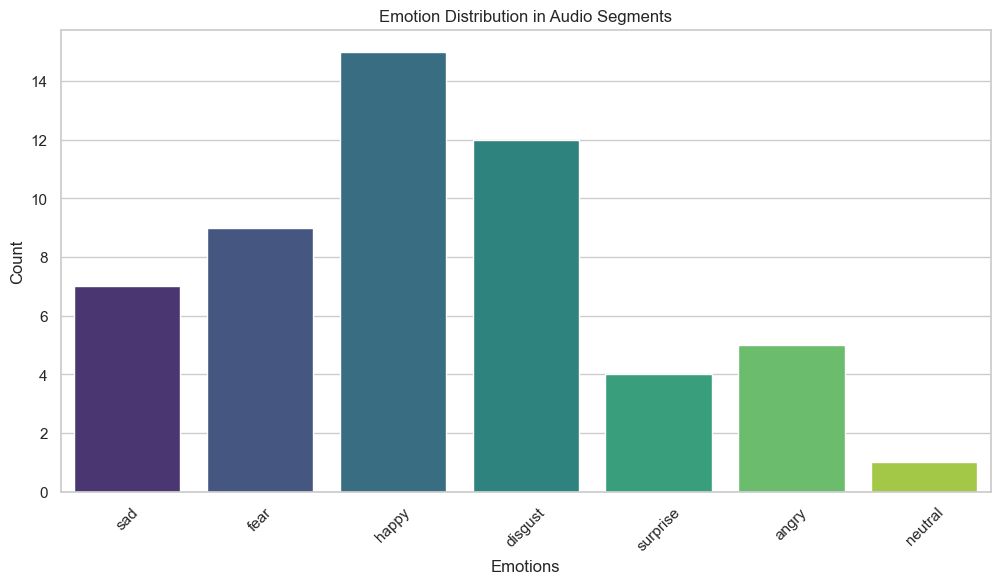

In [43]:
emos = [emotion['emotions'][0] for emotion in chunks_emotion]
#plotting the emotions
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=emos, palette="viridis")
plt.title('Emotion Distribution in Audio Segments')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
filenames = emodb['filename'].to_list()
for filename in filenames:
    result = processor.process_file(file_path)
    print(result)

{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable 'texts' referenced before assignment"}
{'error': "local variable